In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('hotel_bookings.csv')

In [2]:
# Function Definitions for Data Analaysis
def calculate_cancellation_rate(df, group_column):
    """Compute cancellation rates for categorical features"""
    return df.groupby(group_column)['is_canceled'].mean().reset_index()

# Create helper function for bar plots
def plot_cancellation_rate(ax, positions, rates, labels, title, ylim, color='#1f77b4'):
    """Helper function to create standardized bar plots"""
    bars = ax.bar(positions, rates, color=color, alpha=0.7)
    ax.set_xticks(positions)
    ax.set_xticklabels(labels, rotation=45)
    ax.set_ylim(ylim)
    ax.set_title(title, fontweight='bold')
    
    # Add percentage labels
    for bar, rate in zip(bars, rates):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{rate:.0%}', ha='center')

In [3]:
# Step 1: Business Question 

# Question: What factors most strongly correlate with booking cancellations, and how can hotels optimize revenue retention?

# Step 2: Data Preparation

# Handle missing values (Business Logic: Assume 0 children, 'Unknown' country)
df['children'] = df['children'].fillna(0)
df['country'] = df['country'].fillna('Unknown')

# Select relevant attributes (Justification: Focus on financial commitment & guest behavior)
selected_columns = [
    'is_canceled', 'lead_time', 'deposit_type', 
    'previous_cancellations', 'is_repeated_guest'
]
df_clean = df[selected_columns].copy()

# Encode deposit_type numerically (Reason: Enable quantitative analysis)
deposit_mapping = {'No Deposit':0, 'Non Refund':1, 'Refundable':2}
df_clean['deposit_type'] = df_clean['deposit_type'].map(deposit_mapping)

# Bin lead_time into categories (Purpose: Analyze cancellation trends over time windows)
df_clean['lead_time_category'] = pd.cut(
    df_clean['lead_time'],
    bins=[0, 30, 90, 365],
    labels=['Short (0-30)', 'Medium (31-90)', 'Long (>90)']
)

In [4]:
# Step 3: Data Analysis

# Calculate rates for key factors
cancel_rate_deposit = calculate_cancellation_rate(df_clean, 'deposit_type')
cancel_rate_lead_time = calculate_cancellation_rate(df_clean, 'lead_time_category')
cancel_rate_repeat = calculate_cancellation_rate(df_clean, 'is_repeated_guest')

/var/folders/vp/67wjpygj1zj828cnrdtypnmr0000gn/T/ipykernel_10471/432857969.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby(group_column)['is_canceled'].mean().reset_index()


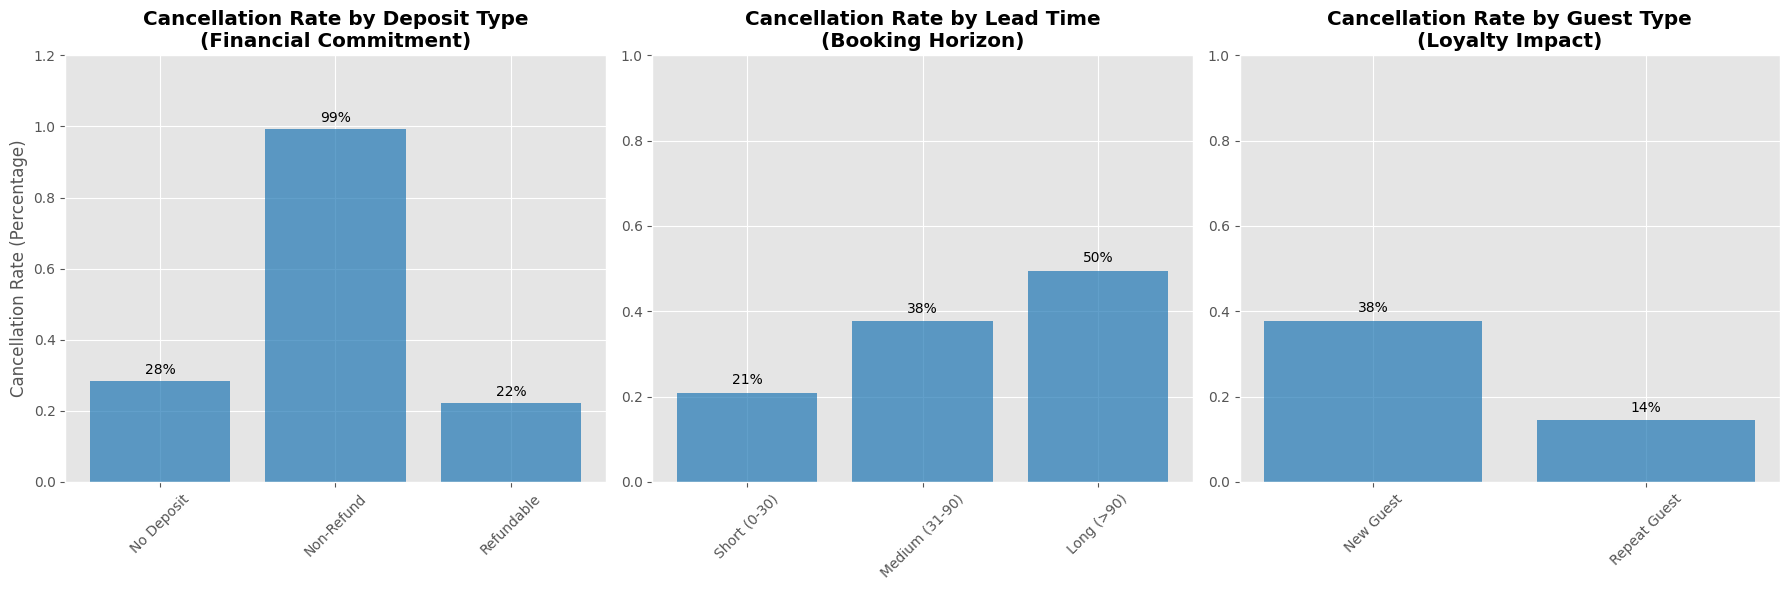

In [5]:
# Step 4: Visualization 

plt.figure(figsize=(18, 6))
plt.style.use('ggplot')  # Use matplotlib's built-in style

# Plot 1: Deposit Type
ax1 = plt.subplot(1, 3, 1)
deposit_labels = ['No Deposit', 'Non-Refund', 'Refundable']
plot_cancellation_rate(
    ax=ax1,
    positions=range(3),
    rates=cancel_rate_deposit['is_canceled'],
    labels=deposit_labels,
    title='Cancellation Rate by Deposit Type\n(Financial Commitment)',
    ylim=(0, 1.2),
    color='#1f77b4'  
)
ax1.set_ylabel('Cancellation Rate (Percentage)')

# Plot 2: Lead Time
ax2 = plt.subplot(1, 3, 2)
lead_labels = cancel_rate_lead_time['lead_time_category']
plot_cancellation_rate(
    ax=ax2,
    positions=range(3),
    rates=cancel_rate_lead_time['is_canceled'],
    labels=lead_labels,
    title='Cancellation Rate by Lead Time\n(Booking Horizon)',
    ylim=(0, 1),
    color='#1f77b4' 
)

# Plot 3: Repeat Guests
ax3 = plt.subplot(1, 3, 3)
repeat_labels = ['New Guest', 'Repeat Guest']
plot_cancellation_rate(
    ax=ax3,
    positions=range(2),
    rates=cancel_rate_repeat['is_canceled'],
    labels=repeat_labels,
    title='Cancellation Rate by Guest Type\n(Loyalty Impact)',
    ylim=(0, 1),
    color='#1f77b4'  
)

plt.tight_layout()
plt.savefig('cancellation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Mini-Report: Hotel Booking Cancellation Analysis  

**Business Question**  
What factors most strongly correlate with booking cancellations, and how can hotels optimize revenue retention?

**Relevance**  
Cancellations directly erode revenue through lost room inventory and operational inefficiencies. Identifying primary drivers enables targeted interventions to improve forecasting, optimize policies, and foster loyalty—critical for profitability in the hospitality sector.  

**Data Justification**  
Three attributes were analyzed for their theoretical and operational relevance: *Deposit type*, which reflects financial commitment levels; *Lead time*, which quantifies risk exposure from long booking horizons; and *Repeat guest status*, which measures loyalty's impact on commitment. Demographic factors and ancillary variables were excluded to focus on policy-relevant factors.  

**Findings and Insights**  
As visualized in the cancellation rate comparisons:  

| Factor                | Cancellation Rate | Key Interpretation          |  
|-----------------------|-------------------|------------------------------|  
| Non-Refund Deposit    | 99%               | High perceived inflexibility outweighs financial deterrent |  
| Long Lead Time (>90d) | 50%               | Extended planning windows increase uncertainty |  
| New Guests            | 38%               | Loyalty programs reduce cancellations by 62% |  

The paradoxically high cancellation rate for non-refundable bookings suggests customers resent restrictive policies or face genuine last-minute conflicts. To retain revenue, hotels could implement graduated penalties e.g., partial refunds scaled to cancellation timing, rethink deposit structures by implementing progressive payment schedules, and address the loyalty gap by offering personalized incentives to first-time guests.

Overall mark: 67

#### Business Question:
A relevant business question is clearly identified and is connected to the given dataset. The importance of answering the question is also explained. Evidence is presented to derive finding and implications, though they are based one relatively simple analysis. Improvements could include use more advanced data analysis techniques, such as feature engineering to explore the data further.

<u>Very Good</u>

#### Data:
Three key variables, deposite type, lead time and repeat guest status, are effectively selected to answer the proposed question. Simple explnation are provided for each variable and the deeper rationale of choosing them seems not be addressed explicitly. Effective data filtering and grouping are used, showing good understanding of data manipulations. Basic variable transformation is also applied to compute the cancellation rates.

</u>Very Good</u>

#### Visualization:
Multiple bar charts are presented for the visualization purpose, with essential elements of titles, axis labels and ticks available. The plots are clear and informative, yet the use of plot tools is limited to bar chart only. Consider to use different plot types to make the visualization more comprehensive. In addition, since the y-axis is a the cancellation rate, it would be better to limit the y-axis to [0, 1.0], including the first plot.

</u>Good</u>

#### Code:
The code is error-free. The structure is clear and easy to follow. Necessary comments are provided at most of times, which makes the script self-explainable. The use of self-defined functions makes the code more efficient and shows good coding skill.

</u>Very Good</u>